# DATA LOAD

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.metrics import f1_score
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [6]:
!pip install optuna

In [7]:
!pip install catboost

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
train_df = pd.read_csv('/content/drive/MyDrive/ESAA YB/0_Summer_project/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ESAA YB/0_Summer_project/test.csv')

In [10]:
train_df.head()

,ID,ip_src,port_src,ip_dst,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,...,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets,attack_type
0,TRAIN_00000,192.168.10.18,3721.0,192.168.10.243,55.0,UDP,0.000231,2,2,8656.974200,...,1.142721e+06,81.000000,81.000000,0,0,0,0,0,NaN,Benign
1,TRAIN_00001,192.168.10.5,NaN,NaN,91.0,TCP,0.000000,0,1,0.000000,...,0.000000e+00,0.000000,0.000000,0,16392,0,0,0,1.499097e+09,Benign
2,TRAIN_00002,172.16.0.182,NaN,192.168.10.18,83.0,TCP,0.606002,11,5,18.151760,...,1.913360e+04,790.125000,790.125000,29200,28960,2,4,1,4.040012e-02,Hulk
3,TRAIN_00003,NaN,47668.0,192.168.10.18,NaN,TCP,1.003829,6,6,5.977114,...,1.155077e+04,993.416667,993.416667,29200,28960,3,2,0,9.125718e-02,Hulk
4,TRAIN_00004,192.168.10.5,51753.0,151.101.2.116,451.0,TCP,181.195271,62,89,NaN,...,6.896758e+02,NaN,NaN,8192,29200,2,22,0,NaN,Benign


In [11]:
test_df.head()

,ID,ip_src,port_src,ip_dst,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,...,rate_fwd_bytes,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets
0,TEST_0000,192.168.10.243,61955.0,192.168.10.249,55.0,UDP,351.844741,3,3,NaN,...,0.409271,0.719067,NaN,NaN,0,0,0,0,0,NaN
1,TEST_0001,NaN,53118.0,NaN,2094.0,TCP,0.000063,1,1,15887.515152,...,0.000000,0.000000,0.00,0.00,29200,0,1,0,1,NaN
2,TEST_0002,192.168.10.43,NaN,NaN,51.0,UDP,0.060045,2,2,33.308350,...,1299.025647,2231.659444,53.00,53.00,0,0,0,0,0,0.020015
3,TEST_0003,192.168.10.243,62431.0,192.168.10.249,61.0,UDP,NaN,2,2,0.008455,...,0.384714,0.930079,77.75,77.75,0,0,0,0,0,78.846374
4,TEST_0004,NaN,62365.0,192.168.10.249,56.0,UDP,0.095316,1,1,10.491425,...,482.605567,1363.885298,88.00,88.00,0,0,0,0,0,NaN


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11999 non-null  object 
 1   ip_src            9487 non-null   object 
 2   port_src          8625 non-null   float64
 3   ip_dst            10695 non-null  object 
 4   port_dst          9712 non-null   float64
 5   protocol          11999 non-null  object 
 6   duration          10925 non-null  float64
 7   pkt_count_fwd     11999 non-null  int64  
 8   pkt_count_bwd     11999 non-null  int64  
 9   rate_fwd_pkts     10828 non-null  float64
 10  rate_bwd_pkts     10312 non-null  float64
 11  rate_fwd_bytes    11999 non-null  float64
 12  rate_bwd_bytes    11999 non-null  float64
 13  payload_fwd_mean  10214 non-null  float64
 14  payload_bwd_mean  10214 non-null  float64
 15  tcp_win_fwd_init  11999 non-null  int64  
 16  tcp_win_bwd_init  11999 non-null  int64 

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                3000 non-null   object 
 1   ip_src            2363 non-null   object 
 2   port_src          2175 non-null   float64
 3   ip_dst            2655 non-null   object 
 4   port_dst          2438 non-null   float64
 5   protocol          3000 non-null   object 
 6   duration          2725 non-null   float64
 7   pkt_count_fwd     3000 non-null   int64  
 8   pkt_count_bwd     3000 non-null   int64  
 9   rate_fwd_pkts     2672 non-null   float64
 10  rate_bwd_pkts     2588 non-null   float64
 11  rate_fwd_bytes    3000 non-null   float64
 12  rate_bwd_bytes    3000 non-null   float64
 13  payload_fwd_mean  2536 non-null   float64
 14  payload_bwd_mean  2536 non-null   float64
 15  tcp_win_fwd_init  3000 non-null   int64  
 16  tcp_win_bwd_init  3000 non-null   int64  


# 전처리

In [14]:
train = train_df.copy() ## 데이터 복사
test = test_df.copy()

## payload 결측치 관련 파생변수

In [15]:
# payload 결측치 플래그
train['payload_bwd_missing_flag'] = train['payload_bwd_mean'].isna().astype(int)
test['payload_bwd_missing_flag'] = test['payload_bwd_mean'].isna().astype(int)

## 결측치 처리

In [16]:
#=============================================================================
# 포트 변수 변수 => -1
# payload, rate, iat_avg_packets, duration, => 중앙값
#=============================================================================

train['port_src'].fillna(-1, inplace=True) # -1 대체
train['port_dst'].fillna(-1, inplace=True)

payload_bwd_median = train['payload_bwd_mean'].median() # 중앙값 대체
train['payload_bwd_mean'].fillna(payload_bwd_median, inplace=True)

payload_fwd_median = train['payload_fwd_mean'].median()
train['payload_fwd_mean'].fillna(payload_fwd_median, inplace=True)

iat_median = train['iat_avg_packets'].median()
train['iat_avg_packets'].fillna(iat_median, inplace=True)

duration_median = train['duration'].median()
train['duration'].fillna(duration_median, inplace=True)

rate_fwd_median = train['rate_fwd_pkts'].median()
train['rate_fwd_pkts'].fillna(rate_fwd_median, inplace=True)

rate_bwd_median = train['rate_bwd_pkts'].median()
train['rate_bwd_pkts'].fillna(rate_bwd_median, inplace=True)

In [17]:
test['port_src'].fillna(-1, inplace=True) # -1 대체
test['port_dst'].fillna(-1, inplace=True)

payload_bwd_median = test['payload_bwd_mean'].median() # 중앙값 대체
test['payload_bwd_mean'].fillna(payload_bwd_median, inplace=True)

payload_fwd_median = test['payload_fwd_mean'].median()
test['payload_fwd_mean'].fillna(payload_fwd_median, inplace=True)

iat_median = test['iat_avg_packets'].median()
test['iat_avg_packets'].fillna(iat_median, inplace=True)

duration_median = test['duration'].median()
test['duration'].fillna(duration_median, inplace=True)

rate_fwd_median = test['rate_fwd_pkts'].median()
test['rate_fwd_pkts'].fillna(rate_fwd_median, inplace=True)

rate_bwd_median = test['rate_bwd_pkts'].median()
test['rate_bwd_pkts'].fillna(rate_bwd_median, inplace=True)

## 값 기반 범주화 (syn_flag_cat, port_dst_cat)

In [18]:
#=============================================================================
# tcp_syn_count => 3개로 범주화
# port_dst => 1~2023/이후 상위 5개/나머지
#=============================================================================

def categorize_syn(x):
    if x == 0:
        return 0  # 정상
    elif x in [1, 2]:
        return 1  # 약간의 SYN 요청
    else:
        return 2  # SYN Flooding 가능성

train['syn_flag_cat'] = train['tcp_syn_count'].apply(categorize_syn)
test['syn_flag_cat'] = test['tcp_syn_count'].apply(categorize_syn)

In [19]:
# port_dst>1023 데이터 중 상위 5개 포트 추출
dst_port_high = train[train['port_dst'] > 1023]['port_dst']
top5_ports = dst_port_high.value_counts().nlargest(5).index

def categorize_port_dst(p):
    if p <= 1023:
        return str(int(p))  # 0~1023은 그대로
    elif p in top5_ports:
        return f'special_{int(p)}' # 1024, 8072, 49152, 8079, 2602
    else:
        return 'other'

train['port_dst_cat'] = train['port_dst'].apply(categorize_port_dst)

In [20]:
dst_port_high_test = test[test['port_dst'] > 1023]['port_dst']
top5_ports_test = dst_port_high_test.value_counts().nlargest(5).index

def categorize_port_dst_test(p):
    if p <= 1023:
        return str(int(p))  # 0~1023은 그대로
    elif p in top5_ports_test:
        return f'special_{int(p)}' # 1024, 8072, 49152, 8079, 2602
    else:
        return 'other'

test['port_dst_cat'] = test['port_dst'].apply(categorize_port_dst_test)

## 추가 파생변수

In [21]:
# PSH 유무: tcp_psh_count > 0 → 1, else → 0
train['has_psh_flag'] = (train['tcp_psh_count'] > 0).astype(int)
test['has_psh_flag'] = (test['tcp_psh_count'] > 0).astype(int)

# 초당 패킷 전송 비율 = rate_fwd_pkts / rate_bwd_pkts
train['rate_pkts_ratio'] = train['rate_fwd_pkts'] / (train['rate_bwd_pkts'] + 1e-5) # 0으로 나누는 것 방지
test['rate_pkts_ratio'] = test['rate_fwd_pkts'] / (test['rate_bwd_pkts'] + 1e-5)

# 송수신 패킷 비율 = pkt_count_fwd / pkt_count_bwd
train['pkt_count_ratio'] = train['pkt_count_fwd'] / (train['pkt_count_bwd'] + 1e-5)
test['pkt_count_ratio'] = test['pkt_count_fwd'] / (test['pkt_count_bwd'] + 1e-5)

# 패킷 간 평균 시간 간격 이진 파생변수: iat_avg_packets <= 1 → 1, else → 0
train['is_iat_low'] = (train['iat_avg_packets'] <= 1.0).astype(int)
test['is_iat_low'] = (test['iat_avg_packets'] <= 1.0).astype(int)

train.drop(['tcp_psh_count','rate_fwd_pkts','rate_bwd_pkts',
            'pkt_count_fwd','pkt_count_bwd'], axis=1, inplace=True) ## 불필요한 기존변수삭제
test.drop(['tcp_psh_count','rate_fwd_pkts','rate_bwd_pkts',
            'pkt_count_fwd','pkt_count_bwd'], axis=1, inplace=True)

## 변수 삭제

In [22]:
#=============================================================================
# ID, ip_scr, ip_dst, port_src
# payload_fwd_mean (bwd와 겹치는 칼럼)
#=============================================================================

train.drop(['ID','ip_src','ip_dst','payload_fwd_mean','port_src','port_dst','tcp_syn_count'], axis=1, inplace=True)
test.drop(['ID','ip_src','ip_dst','payload_fwd_mean','port_src','port_dst','tcp_syn_count'], axis=1, inplace=True)

## 로그변환

In [23]:
import numpy as np

log_cols = [
    'duration',
    'rate_fwd_bytes',
    'rate_bwd_bytes',
    'payload_bwd_mean',
    'tcp_rst_count',
    'tcp_win_fwd_init',
    'tcp_win_bwd_init',
    'iat_avg_packets',
    'rate_pkts_ratio',
    'pkt_count_ratio' # 파생변수 포함
]

for col in log_cols:
    train[col] = np.log1p(train[col])

for col in log_cols:
    test[col] = np.log1p(test[col])

## 스케일링

In [24]:
from sklearn.preprocessing import StandardScaler

scale_cols = [
    'duration',
    'rate_fwd_bytes',
    'rate_bwd_bytes',
    'payload_bwd_mean',
    'tcp_rst_count',
    'tcp_win_fwd_init',
    'tcp_win_bwd_init',
    'iat_avg_packets',
    'rate_pkts_ratio',
    'pkt_count_ratio'
]

# 스케일러 객체 생성
scaler = StandardScaler()

# 스케일링 적용
train[scale_cols] = scaler.fit_transform(train[scale_cols])
test[scale_cols] = scaler.transform(test[scale_cols])

## LabelEncoding

In [25]:
from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
le_protocol = LabelEncoder()
le_postdst = LabelEncoder()
le_attack = LabelEncoder()

le_protocol.fit(pd.concat([train['protocol'], test['protocol']], axis=0).astype(str).unique())
le_postdst.fit(pd.concat([train['port_dst_cat'], test['port_dst_cat']], axis=0).astype(str).unique())

train['protocol'] = le_protocol.transform(train['protocol'].astype(str))
train['port_dst_cat'] = le_postdst.transform(train['port_dst_cat'].astype(str))
train['attack_type'] = le_attack.fit_transform(train['attack_type']) # attack_type is only in train

test['protocol'] = le_protocol.transform(test['protocol'].astype(str))
test['port_dst_cat'] = le_postdst.transform(test['port_dst_cat'].astype(str))

## X, Y 데이터 분리

In [26]:
# Features
X = train.drop('attack_type',axis=1)

# Target
y = train['attack_type'].values

In [27]:
# import Library
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=156)

# 모델링

## RandomForest

In [176]:
# Import Library
from sklearn.ensemble import RandomForestClassifier

# --------------------------------------------------------------------------------

# RandomForestClassifier 객체 생성
rf = RandomForestClassifier(n_estimators=100, random_state=156, n_jobs=-1)

# 학습 및 예측
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_val)

print(f'랜덤포레스트 Macro F1 Score: {f1_score(y_val, pred_rf, average="macro"):.4f}')

랜덤포레스트 Macro F1 Score: 0.7058


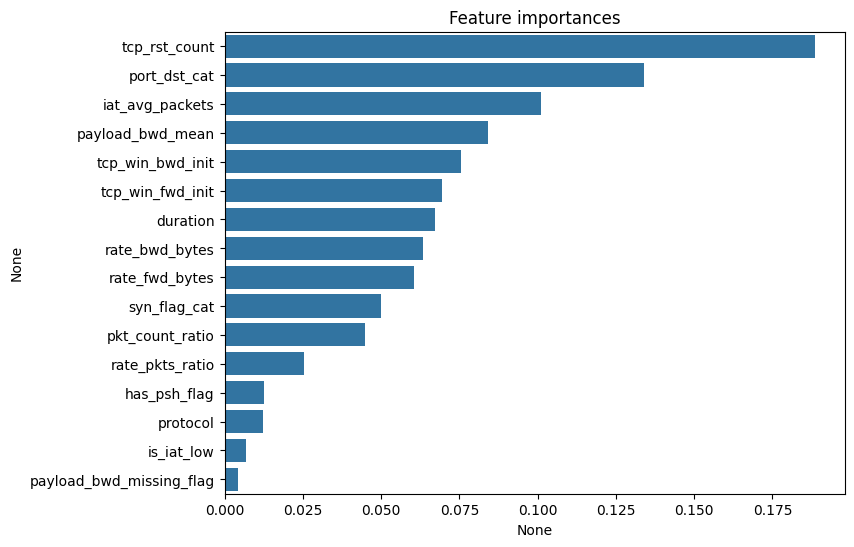

In [177]:
# 피처 중요도 추출
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

# 피처 중요도 시각화
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

### GridSearchCV를 이용한 하이퍼파라미터 튜닝

In [178]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# --------------------------------------------------------------------------------

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=156)

param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 200],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 8, 16]
}
grid = GridSearchCV(RandomForestClassifier(random_state=156, n_jobs=-1), param_grid, cv=5)
grid.fit(X_train, y_train)

# 최적 파라미터로 모델 생성
rf_best = RandomForestClassifier(**grid.best_params_, random_state=156, n_jobs=-1)

rf_best.fit(X_train, y_train)
pred_rf_best = rf_best.predict(X_val)

print(f'랜덤포레스트 Macro F1 Score: {f1_score(y_val, pred_rf_best, average="macro"):.4f}')

랜덤포레스트 Macro F1 Score: 0.6891


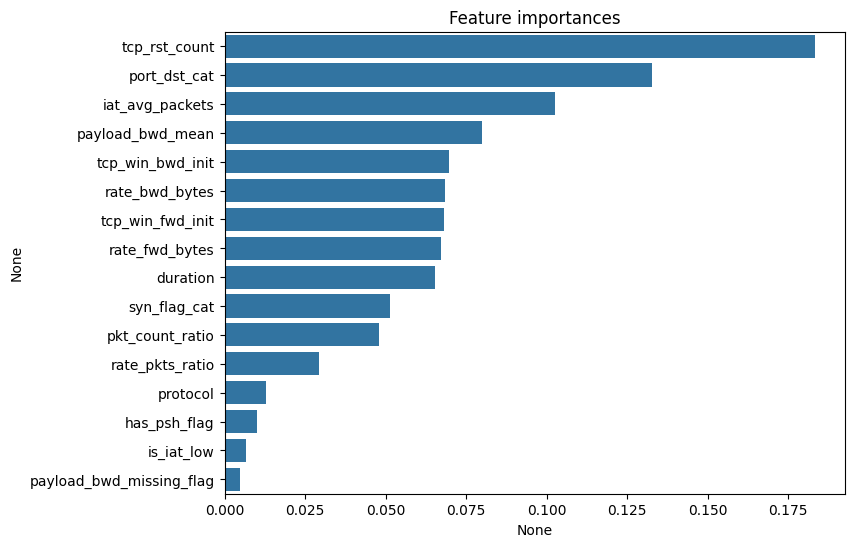

In [179]:
# 피처 중요도 추출
ftr_importances_values = rf_best.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

# 피처 중요도 시각화
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

## XGBoost

In [180]:
# Import Library
import xgboost as xgb
from xgboost import XGBClassifier

# --------------------------------------------------------------------------------

# XGBoostClassifier 객체 생성
xgb = XGBClassifier(n_estimators=300, learning_rate=0.05,
                    random_state=156, n_jobs=-1)

# 학습 및 예측
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_val)

print(f'XGBoost Macro F1 Score: {f1_score(y_val, pred_xgb, average="macro"):.4f}')

XGBoost Macro F1 Score: 0.7606


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 800x600 with 0 Axes>

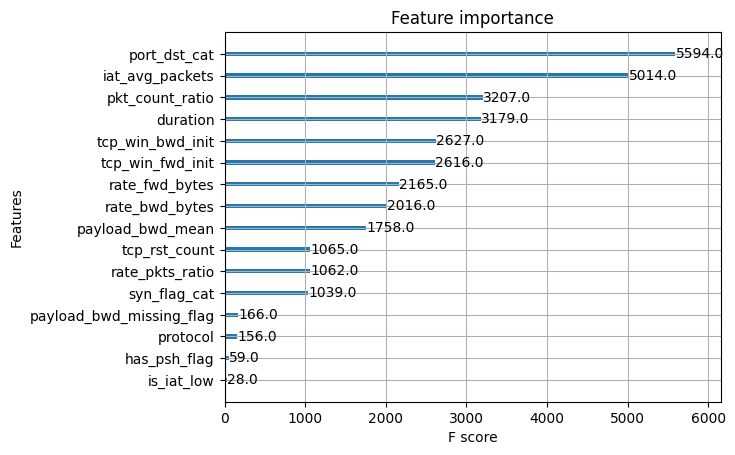

In [181]:
# Import Library
from xgboost import plot_importance

# 피처 중요도 시각화
plt.figure(figsize=(8,6))
plot_importance(xgb)

### Optuna를 이용한 하이퍼파라미터 튜닝

In [182]:
# Import Libraries
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=156)

# objective 함수 생성
def objective(trial):
    params = {
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.005,0.01,0.05,0.1]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }

    model = XGBClassifier(**params, random_state=156, n_jobs=-1)
    score = cross_val_score(model, X_train, y_train, cv=skf, scoring='f1_macro').mean()
    return score

# Optuna 실행
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=156))
study.optimize(objective, n_trials=50)

[I 2025-07-17 11:02:26,534] A new study created in memory with name: no-name-07acd7fc-a7d6-4dc6-9134-bc46cd77431a
[I 2025-07-17 11:03:08,814] Trial 0 finished with value: 0.329531434432349 and parameters: {'colsample_bytree': 1.0, 'subsample': 0.5, 'learning_rate': 0.01, 'n_estimators': 354, 'max_depth': 13, 'min_child_weight': 81}. Best is trial 0 with value: 0.329531434432349.
[I 2025-07-17 11:03:39,884] Trial 1 finished with value: 0.7705024904061133 and parameters: {'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.1, 'n_estimators': 208, 'max_depth': 9, 'min_child_weight': 4}. Best is trial 1 with value: 0.7705024904061133.
[I 2025-07-17 11:04:33,479] Trial 2 finished with value: 0.3249389938359013 and parameters: {'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.005, 'n_estimators': 461, 'max_depth': 13, 'min_child_weight': 159}. Best is trial 1 with value: 0.7705024904061133.
[I 2025-07-17 11:04:46,890] Trial 3 finished with value: 0.2898838941538787 and

In [183]:
# 최적 파라미터 모델 생성
xgb_best = XGBClassifier(**study.best_trial.params, random_state=156, n_jobs=-1)

# 학습 및 예측
xgb_best.fit(X_train, y_train)
pred_xgb_best = xgb_best.predict(X_val)

print(f'XGBoost Macro F1 Score: {f1_score(y_val, pred_xgb_best, average="macro"):.4f}')

XGBoost Macro F1 Score: 0.7340


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 800x600 with 0 Axes>

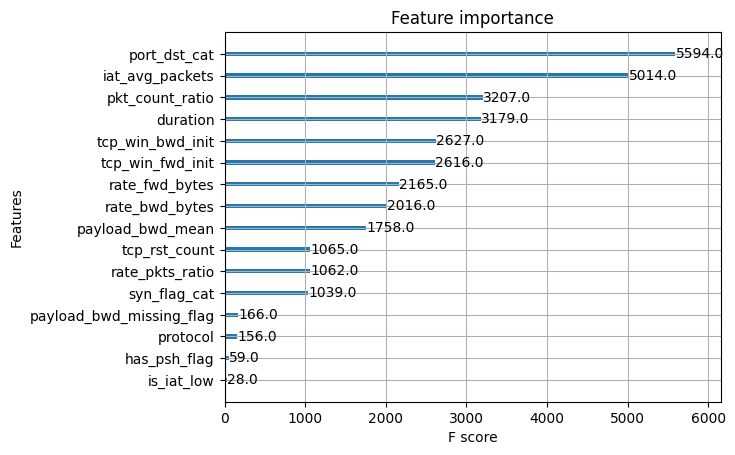

In [184]:
# Import Library
from xgboost import plot_importance

# 피처 중요도 시각화
plt.figure(figsize=(8,6))
plot_importance(xgb)

## LightGBM

In [185]:
# Import Library
from lightgbm import LGBMClassifier

# --------------------------------------------------------------------------------

# LightGBM 객체 생성
lgbm = LGBMClassifier(n_estimators=300, learning_rate=0.05,
                      random_state=156, n_jobs=-1, verbose=0)

# 학습 및 예측
lgbm.fit(X_train, y_train)
pred_lgbm = lgbm.predict(X_val)

print(f'LightGBM Macro F1 Score: {f1_score(y_val, pred_lgbm, average="macro"):.4f}')

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

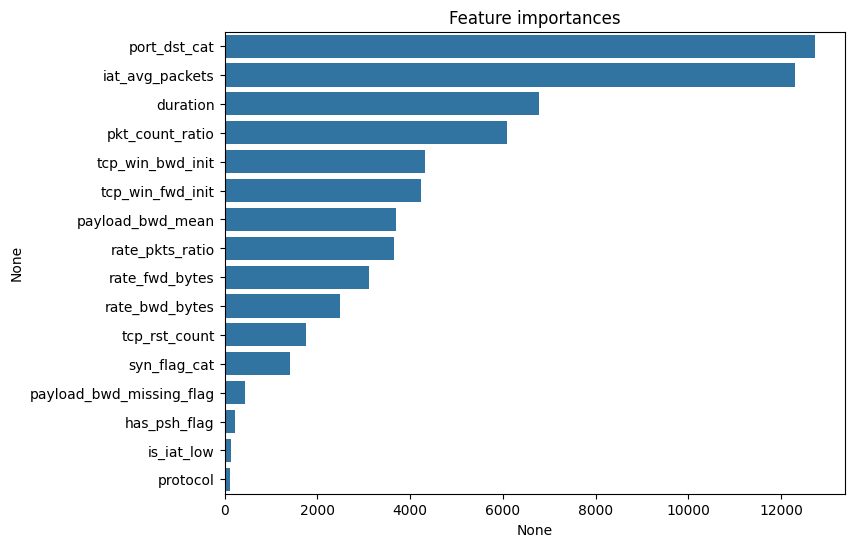

In [186]:
# 피처 중요도 추출
ftr_importances_values = lgbm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

# 피처 중요도 시각화
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

### Optuna를 이용한 하이퍼파라미터 설정

In [187]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=156)

# objective 함수 정의
def objective(trial):
    params = {
        'objective': 'multiclass',
        'num_class': len(set(y_train)),
        'metric': 'multi_logloss',
        'verbose': -1,
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-3, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
    }

    model = LGBMClassifier(**params, random_state=156, n_jobs=-1)

    score = cross_val_score(model, X_train, y_train, cv=skf, scoring='f1_macro').mean()
    return score

# Optuna 실행
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=156)
)
study.optimize(objective, n_trials=50)

[I 2025-07-17 11:32:42,416] A new study created in memory with name: no-name-9c903b79-3f11-4cb9-bcd7-3fe4bfc04237
[I 2025-07-17 11:33:39,500] Trial 0 finished with value: 0.7803037919689191 and parameters: {'max_depth': 7, 'learning_rate': 0.01312202036142357, 'n_estimators': 205, 'min_child_samples': 22, 'subsample': 0.6243442581746613}. Best is trial 0 with value: 0.7803037919689191.
[I 2025-07-17 11:34:57,534] Trial 1 finished with value: 0.7633705123963648 and parameters: {'max_depth': 13, 'learning_rate': 0.044173770439876366, 'n_estimators': 414, 'min_child_samples': 31, 'subsample': 0.5620352250813451}. Best is trial 0 with value: 0.7803037919689191.
[I 2025-07-17 11:36:03,291] Trial 2 finished with value: 0.7325736093157482 and parameters: {'max_depth': 5, 'learning_rate': 0.004633986952690619, 'n_estimators': 301, 'min_child_samples': 43, 'subsample': 0.40360814575488174}. Best is trial 0 with value: 0.7803037919689191.
[I 2025-07-17 11:37:14,265] Trial 3 finished with value: 

In [189]:
# 최적 파라미터 모델 생성
lgbm_best = LGBMClassifier(**study.best_trial.params, random_state=156, n_jobs=-1)

# 학습 및 예측
lgbm_best.fit(X_train, y_train)
pred_lgbm_best = lgbm_best.predict(X_val)

print(f'LightGBM Macro F1 Score: {f1_score(y_val, pred_lgbm_best, average="macro"):.4f}')

LightGBM Macro F1 Score: 0.7167


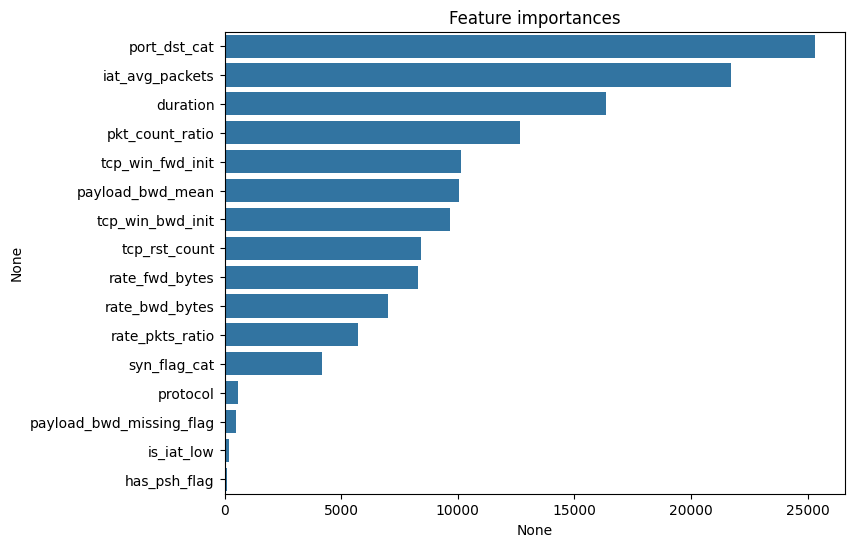

In [190]:
# 피처 중요도 추출
ftr_importances_values = lgbm_best.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

# 피처 중요도 시각화
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

## CatBoost

In [43]:
# Import Library
from catboost import CatBoostClassifier, Pool

# --------------------------------------------------------------------------------

# CatBoost 객체 생성
cat = CatBoostClassifier(n_estimators=300, learning_rate=0.05, random_state=156)

# 학습 및 예측
cat.fit(X_train, y_train)
pred_cat = cat.predict(X_val)

print(f'CatBoost Macro F1 Score: {f1_score(y_val, pred_cat, average="macro"):.4f}')

0:	learn: 2.0901721	total: 36.9ms	remaining: 11s
1:	learn: 1.8270328	total: 70.3ms	remaining: 10.5s
2:	learn: 1.6350262	total: 103ms	remaining: 10.2s
3:	learn: 1.4823042	total: 137ms	remaining: 10.1s
4:	learn: 1.3577416	total: 171ms	remaining: 10.1s
5:	learn: 1.2530602	total: 205ms	remaining: 10s
6:	learn: 1.1639595	total: 244ms	remaining: 10.2s
7:	learn: 1.0865881	total: 283ms	remaining: 10.3s
8:	learn: 1.0171354	total: 317ms	remaining: 10.2s
9:	learn: 0.9555992	total: 350ms	remaining: 10.1s
10:	learn: 0.9008120	total: 384ms	remaining: 10.1s
11:	learn: 0.8502503	total: 419ms	remaining: 10.1s
12:	learn: 0.8048957	total: 454ms	remaining: 10s
13:	learn: 0.7650453	total: 488ms	remaining: 9.97s
14:	learn: 0.7275972	total: 521ms	remaining: 9.89s
15:	learn: 0.6923246	total: 555ms	remaining: 9.84s
16:	learn: 0.6603493	total: 605ms	remaining: 10.1s
17:	learn: 0.6306440	total: 638ms	remaining: 10s
18:	learn: 0.6035021	total: 676ms	remaining: 10s
19:	learn: 0.5761138	total: 710ms	remaining: 9.95

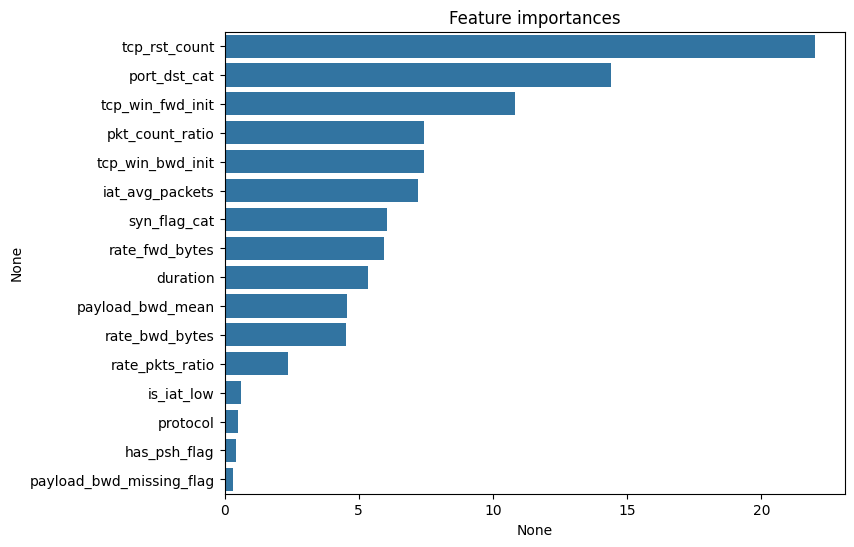

In [192]:
# 피처 중요도 추출
ftr_importances_values = cat.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

# 피처 중요도 시각화
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

### Optuna를 이용한 하이퍼파라미터 튜닝

In [46]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=156)

def objective(trial):
    params = {
        'iterations': trial.suggest_int("iterations", 200, 500),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.2),
        'depth': trial.suggest_int('depth', 3, 10),
        'random_strength': trial.suggest_uniform('random_strength', 10, 50),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 10),
        'task_type': 'GPU',
        'verbose': 0,
        'random_seed': 156,
    }

    scores = []
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        model = CatBoostClassifier(**params, early_stopping_rounds=30)
        model.fit(X_tr, y_tr, eval_set=(X_val, y_val))
        preds = model.predict(X_val)
        score = f1_score(y_val, preds, average='macro')
        scores.append(score)

    return sum(scores) / len(scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2025-07-17 16:46:33,992] A new study created in memory with name: no-name-0116c95d-9b8b-498a-a615-d2b88c0ebf4a
[I 2025-07-17 16:46:41,670] Trial 0 finished with value: 0.3412131216310898 and parameters: {'iterations': 376, 'learning_rate': 0.02794287608521425, 'depth': 5, 'random_strength': 47.3646670292935, 'bagging_temperature': 1.0930137935928324}. Best is trial 0 with value: 0.3412131216310898.
[I 2025-07-17 16:46:56,859] Trial 1 finished with value: 0.7075071436966415 and parameters: {'iterations': 310, 'learning_rate': 0.11295713035436285, 'depth': 7, 'random_strength': 44.51216494568037, 'bagging_temperature': 0.03406956087759917}. Best is trial 1 with value: 0.7075071436966415.
[I 2025-07-17 16:47:01,436] Trial 2 finished with value: 0.5383071549798931 and parameters: {'iterations': 203, 'learning_rate': 0.10732884881370235, 'depth': 3, 'random_strength': 10.676823904816457, 'bagging_temperature': 0.09748792564067014}. Best is trial 1 with value: 0.7075071436966415.
[I 2025-

In [48]:
# 최적 파라미터 모델 생성
cat_best = CatBoostClassifier(**study.best_trial.params, random_state=156)

# 학습 및 예측
cat_best.fit(X_train, y_train)
pred_cat_best = cat_best.predict(X_val)

print(f'CatBoost Macro F1 Score: {f1_score(y_val, pred_cat_best, average="macro"):.4f}')

0:	learn: 1.7899543	total: 721ms	remaining: 4m 19s
1:	learn: 1.4125061	total: 1.54s	remaining: 4m 37s
2:	learn: 1.1677476	total: 2.17s	remaining: 4m 18s
3:	learn: 0.9944221	total: 3.09s	remaining: 4m 35s
4:	learn: 0.8795065	total: 3.88s	remaining: 4m 36s
5:	learn: 0.8038765	total: 3.91s	remaining: 3m 51s
6:	learn: 0.7204368	total: 4.21s	remaining: 3m 32s
7:	learn: 0.6495544	total: 4.53s	remaining: 3m 19s
8:	learn: 0.5872952	total: 4.83s	remaining: 3m 8s
9:	learn: 0.5413830	total: 5.16s	remaining: 3m 1s
10:	learn: 0.4978280	total: 5.49s	remaining: 2m 54s
11:	learn: 0.4632143	total: 5.81s	remaining: 2m 48s
12:	learn: 0.4320023	total: 6.03s	remaining: 2m 41s
13:	learn: 0.3996696	total: 6.32s	remaining: 2m 36s
14:	learn: 0.3708299	total: 6.63s	remaining: 2m 32s
15:	learn: 0.3463960	total: 6.94s	remaining: 2m 29s
16:	learn: 0.3277132	total: 7.2s	remaining: 2m 25s
17:	learn: 0.3073234	total: 7.37s	remaining: 2m 20s
18:	learn: 0.2888490	total: 7.55s	remaining: 2m 15s
19:	learn: 0.2767736	tota

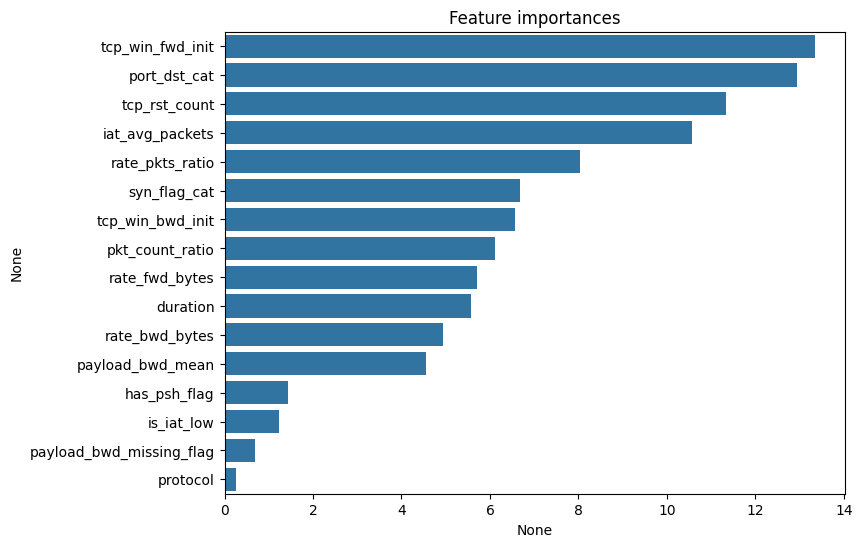

In [49]:
# 피처 중요도 추출
ftr_importances_values = cat_best.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

# 피처 중요도 시각화
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()